In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
df = pd.read_csv(url)
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:>

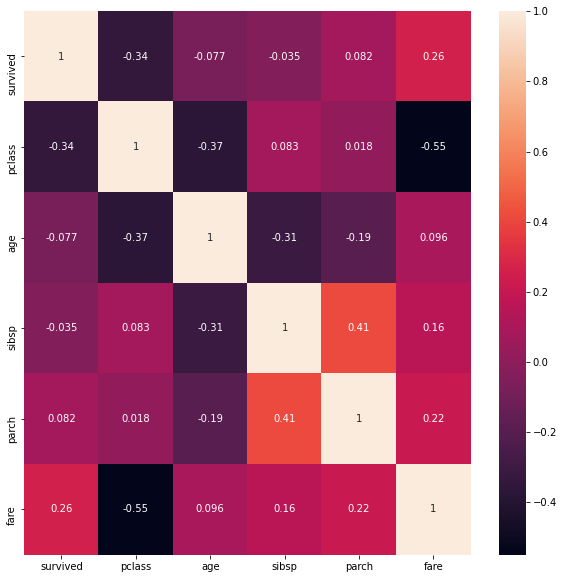

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [ ]:
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [ ]:
def fun(sex):
    return dict(male=1, female=0)[sex]


df['sex'] = df['sex'].apply(fun)

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
def emba(feature):
    return dict(S=3, Q=2, C=1)[feature]


df['embarked'] = df['embarked'].apply(emba)

In [ ]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))

In [ ]:
df.drop(labels='cabin', axis=1, inplace=True)

In [ ]:
df['fare'] = np.round(df['fare'], 2)
df.drop(labels='ticket', axis=1, inplace=True)
df.drop(labels='name', axis=1, inplace=True)

In [ ]:
y = df['survived']
X = df.drop(labels='survived', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

In [ ]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
m, n = model_1.predict(X_test), y_test
print(confusion_matrix(m, n))
print("Accuracy: ", accuracy_score(m, n) * 100, "%")
print("Precision: ", precision_score(m, n) * 100, "%")
print("Recall: ", recall_score(m, n))
print("F1: ", f1_score(m, n))

[[13  5]
 [ 8 29]]
Accuracy:  76.36363636363637 %
Precision:  85.29411764705883 %
Recall:  0.7837837837837838
F1:  0.8169014084507041


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# final model
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(random_state=547)
model_2.fit(X_train, y_train)
m, n = model_2.predict(X_test), y_test
print(confusion_matrix(m, n))
acc = accuracy_score(m, n)
pre = precision_score(m, n)
print("Accuracy: ", acc * 100, "%")
print("Precision: ", pre * 100, "%")
print("Recall: ", recall_score(m, n))
print("F1: ", f1_score(m, n))

[[11  1]
 [10 33]]
Accuracy:  80.0 %
Precision:  97.05882352941177 %
Recall:  0.7674418604651163
F1:  0.8571428571428571


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier(random_state=547)
model_3.fit(X_train, y_train)
m, n = model_3.predict(X_test), y_test
print(confusion_matrix(m, n))
acc = accuracy_score(m, n)
pre = precision_score(m, n)
print("Accuracy: ", acc * 100, "%")
print("Precision: ", pre * 100, "%")
print("Recall: ", recall_score(m, n))
print("F1: ", f1_score(m, n))

[[10  3]
 [11 31]]
Accuracy:  74.54545454545455 %
Precision:  91.17647058823529 %
Recall:  0.7380952380952381
F1:  0.8157894736842106
